# Polynomial Regression

## Dataset

Have a quick look at the dataset.

In [3]:
%cat ../00_data/Position_Salaries.csv | head

Position,Level,Salary
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


In [4]:
%cat ../00_data/Position_Salaries.csv | tail

Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000
CEO,10,1000000

## Goal

Try to suppose the dependent variable **Salary** based on other predictors (independent variables).

## Loading libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading data

In [11]:
df = pd.read_csv('../00_data/Position_Salaries.csv', decimal='.', sep=',')

df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


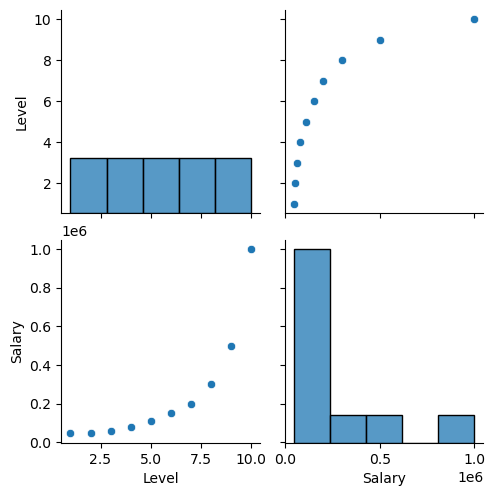

In [12]:
import seaborn as sns
sns.pairplot(df);

## Data Preprocessing

In [13]:
df.shape

(10, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [15]:
np.sum(df.isna(), axis=0)

Position    0
Level       0
Salary      0
dtype: int64

## Target Variable and Features

In [67]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [17]:
X[:5, :]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [18]:
y[:5]

array([ 45000,  50000,  60000,  80000, 110000])

## Trianing the Linear Regression model on the whole dataset

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Trianing the Polynomial Regression model on the whole dataset

In [69]:
from sklearn.preprocessing import PolynomialFeatures
polinom_features = PolynomialFeatures(degree=2)
X_poly = polinom_features.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [70]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

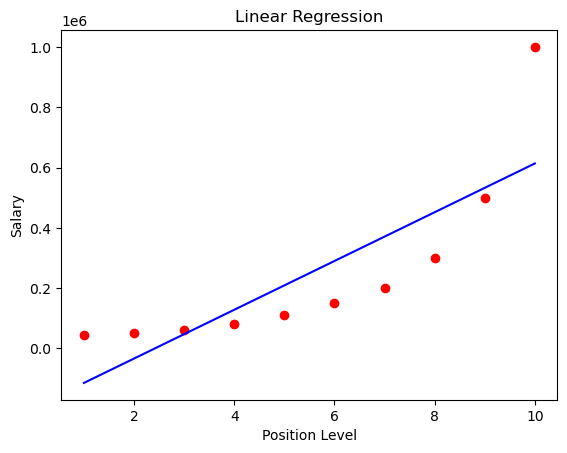

In [71]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

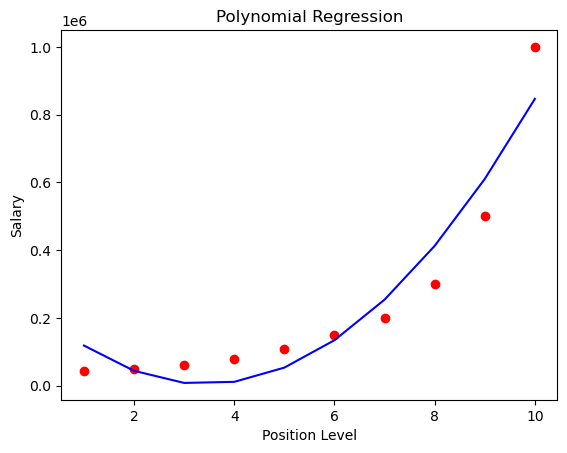

In [72]:
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Overfitting with 4th degree

In [73]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

polinom_features = PolynomialFeatures(degree=4)
X_poly = polinom_features.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

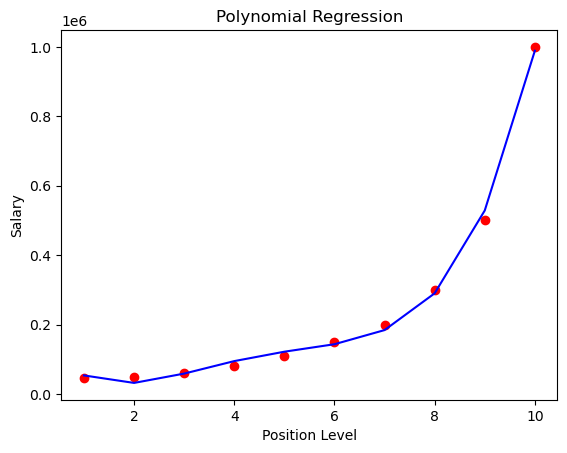

In [75]:
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [80]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [84]:
pol_reg.predict(polinom_features.fit_transform([[6.5]]))

array([158862.45265155])